# Convolutional Neural Network

### Importing the libraries

In [1]:
import os
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
train_dir = './dataset/training_set'

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

print(f'total training cat images: {len(os.listdir(train_cats_dir))}')
print(f'total training dog images: {len(os.listdir(train_dogs_dir))}')

#Pixels of a image
image_size = 64
batch_size = 32

#Apply data augmentation to reducing overfitting
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

train_dataset = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (image_size, image_size),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

total training cat images: 4000
total training dog images: 4000
Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [21]:
test_dir = './dataset/test_set'

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

print(f'total test cat images: {len(os.listdir(test_cats_dir))}')
print(f'total test dog images: {len(os.listdir(test_dogs_dir))}')

#Normalizes pixel values to the range [0, 1]
test_datagen = ImageDataGenerator(rescale = 1./255)

test_dataset = test_datagen.flow_from_directory(test_dir,
                                                 target_size = (image_size, image_size),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

total test cat images: 1000
total test dog images: 1000
Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
model =  Sequential([
    # 3 bytes for color depth
    tf.keras.Input(shape=(image_size, image_size, 3)),
])

### Step 1 - Convolution

In [6]:
#A 2D convolutional layer
model.add(Conv2D(32, (3,3), activation='relu'))
#Normalizes the output of the previous layer
model.add(BatchNormalization())

### Step 2 - Pooling

In [7]:
model.add(MaxPooling2D(2,2))
#Reduce overfitting
model.add(Dropout(0.2))

### Adding a second convolutional layer

In [8]:
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

### Step 3 - Flattening

In [9]:
model.add(Flatten())

### Step 4 - Full Connection

In [10]:
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

### Step 5 - Output Layer

In [11]:
model.add(Dense(1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [12]:
model.summary()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics = ['accuracy']
    )

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 915,649 (3.49 MB)

 Trainable params: 914,689 (3.49 MB)

 Non-trainable params: 960 (3.75 KB)

### Training the CNN on the Training set and evaluating it on the Test set

In [13]:
history = model.fit(
    train_dataset,
    epochs = 30,
    validation_data = test_dataset
    )

F:\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.5737 - loss: 1.0386

F:\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 56s 208ms/step - accuracy: 0.5738 - loss: 1.0375 - val_accuracy: 0.5000 - val_loss: 1.4872
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 211ms/step - accuracy: 0.6934 - loss: 0.5964 - val_accuracy: 0.5170 - val_loss: 0.8746
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 215ms/step - accuracy: 0.7066 - loss: 0.5584 - val_accuracy: 0.7385 - val_loss: 0.5340
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 57s 226ms/step - accuracy: 0.7286 - loss: 0.5301 - val_accuracy: 0.7455 - val_loss: 0.5295
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 214ms/step - accuracy: 0.7465 - loss: 0.5036 - val_accuracy: 0.7540 - val_loss: 0.5404
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 221ms/step - accuracy: 0.7767 - loss: 0.4607 - val_accuracy: 0.7810 - val_loss: 0.4640
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 217ms/step - accuracy: 0.7903 - loss: 0.4428 - val_accuracy: 0.7900 - val_loss: 0.4550
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 54s 214ms/step - accuracy: 0.8017 - loss: 0.4264 - val

### Evaluating the Model

In [23]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.8654 - loss: 0.3480
Test Loss: 0.3203226327896118
Test Accuracy: 0.8730000257492065


## Part 4 - Making a single prediction

In [14]:
single_prediction_dir = './dataset/single_prediction'
prediction_image_paths = [os.path.join(single_prediction_dir, filename) for filename in os.listdir(single_prediction_dir)]
print(prediction_image_paths)

['./dataset/single_prediction\\cat_or_dog_1.jpg', './dataset/single_prediction\\cat_or_dog_2.jpg']


In [15]:
def predict_image(model, image_path):
    image = tf.keras.utils.load_img(image_path, target_size=(image_size, image_size))
    image = tf.keras.utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    label = 'Dog' if prediction[0][0] > 0.5 else 'Cat'
    return label, prediction[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


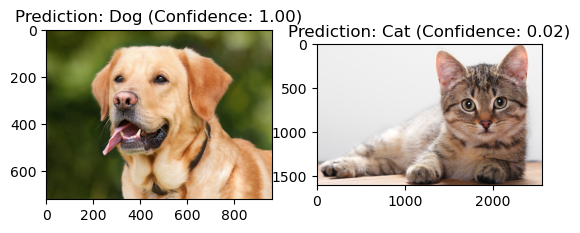

In [19]:
nrows = (len(prediction_image_paths) + 1) // 2
ncols = 2
for i, image_path in enumerate(prediction_image_paths):
    label, confidence = predict_image(model, image_path)
    sp = plt.subplot(nrows, ncols, i + 1)
    plt.imshow(tf.keras.utils.load_img(image_path))
    plt.title(f"Prediction: {label} (Confidence: {confidence:.2f})")
plt.show()

### Evaluating Accuracy and Loss for the Model

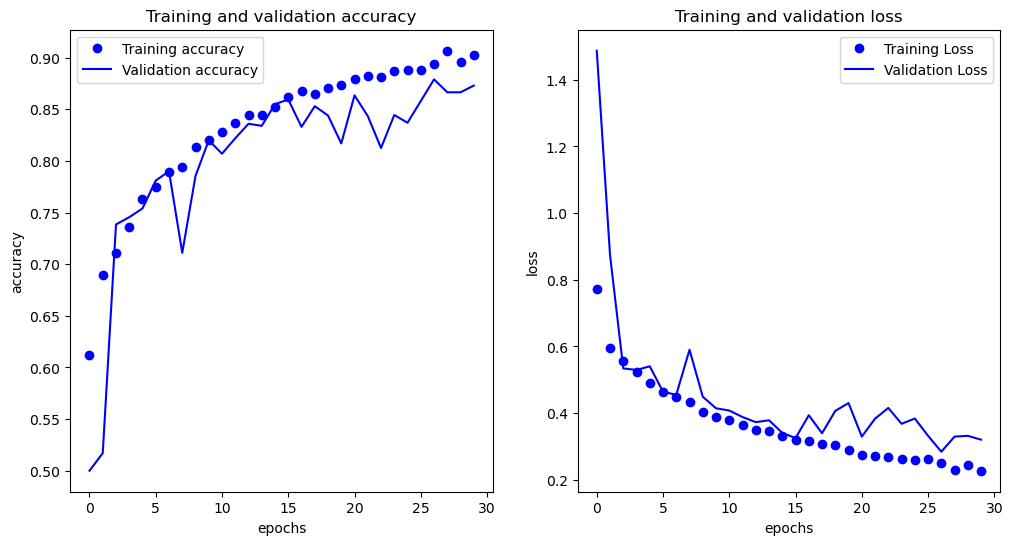

In [20]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()
    
    ax[1].plot(epochs, loss, 'bo', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Training and validation loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()
    
    plt.show()

plot_loss_acc(history)

[Github link](https://github.com/Solidays/CNN_Dogs-vs-Cats_Image_Classification)

[Medium link](https://medium.com/@starchen12cx/using-tensorflow-to-implement-cnn-for-dogs-and-cats-image-classification-bc10c6c7d67f)